In [1]:
#Section 1.1 - Importing required python libraries 

import matplotlib.pyplot as plt #Library for creating visualizations
import seaborn as sns #Library for creating attractive visualizations
import numpy as np #Library for Numerical computations
import pandas as pd #Library for Data manipulations
import os # Library to navigate through file structure
from glob import glob # Library to find pathnames
from PIL import Image #to read images 

In [2]:
#Section 1.2 - Loading the metadata file
#Section 1.2a - Code to load the metadatafile file to the dataframe to give us an insight into the main data
skin_df=pd.read_csv('HAM10000_metadata')

#Section 1.2b - Code to print the first few rows of the dataframe
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:
#Section 1.2c -  Rename target feature for easy identification
skin_df = skin_df.rename(columns={'dx': 'category'})
skin_df.head()

,lesion_id,image_id,category,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [4]:
#Section 1.3 - Code to print the shape of the dataframe
print("The shape of the dataset is :", skin_df.shape)

The shape of the dataset is : (10015, 8)


In [5]:
#Section 1.4 - code to print the features of our dataset
print("The features of the dataset:", skin_df.columns)

The features of the dataset: Index(['lesion_id', 'image_id', 'category', 'dx_type', 'age', 'sex',
       'localization', 'dataset'],
      dtype='object')


In [6]:
#Section 1.5 - code to check for missing data
skin_df.isnull().sum()

lesion_id        0
image_id         0
category         0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

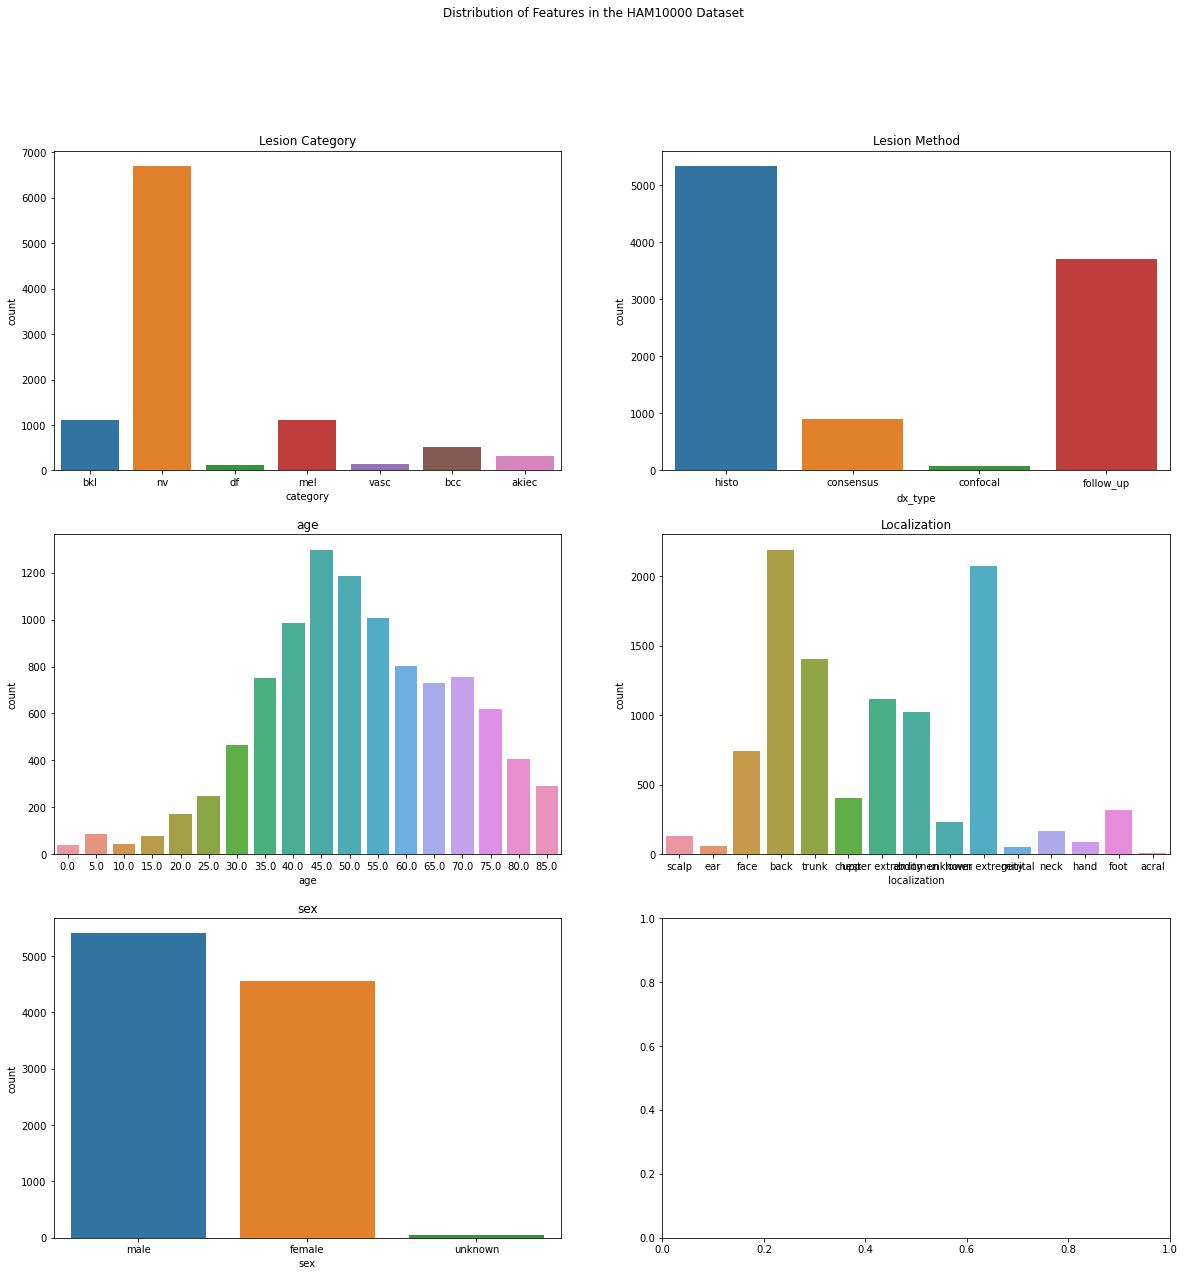

In [7]:
#Section 1.6 - Data distribution visualization
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
#code to print the Distribution of the class features 
sns.countplot(ax=axes[0, 0], data=skin_df, x="category") # Plot data on the subplot
axes[0, 0].set_title("Lesion Category") # Set title for the subplot

sns.countplot(ax=axes[0, 1], data=skin_df, x="dx_type")
axes[0, 1].set_title("Lesion Method")

sns.countplot(ax=axes[1, 0], data=skin_df, x="age")
axes[1, 0].set_title("age")

sns.countplot(ax=axes[1, 1], data=skin_df, x="localization")
axes[1, 1].set_title("Localization")

sns.countplot(ax=axes[2, 0], data=skin_df, x="sex")
axes[2, 0].set_title("sex")

# Set overall title for the figure
fig.suptitle("Distribution of Features in the HAM10000 Dataset")

# Display the figure
plt.show()

In [8]:
#Section 1.7 - code to display the value counts of the target feature
skin_df['category'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: category, dtype: int64

In [9]:
#Section 1.8 - Explore Image Data 
#Section 1.8.1a - Create an image path and Load all jpg from the subdirectory 
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('HAM10000_images', '*', '*.jpg'))}

In [10]:
#Section 1.8.1b - Define the path and adding the path as a new column to the dataframe so we can use the path to read the image 
skin_df['path'] = skin_df['image_id'].map(image_path.get)

In [11]:
#Section 1.8.1c - Use the path to read image, resize to 32 x 32, converts to an array and saves the array in the dataframe
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

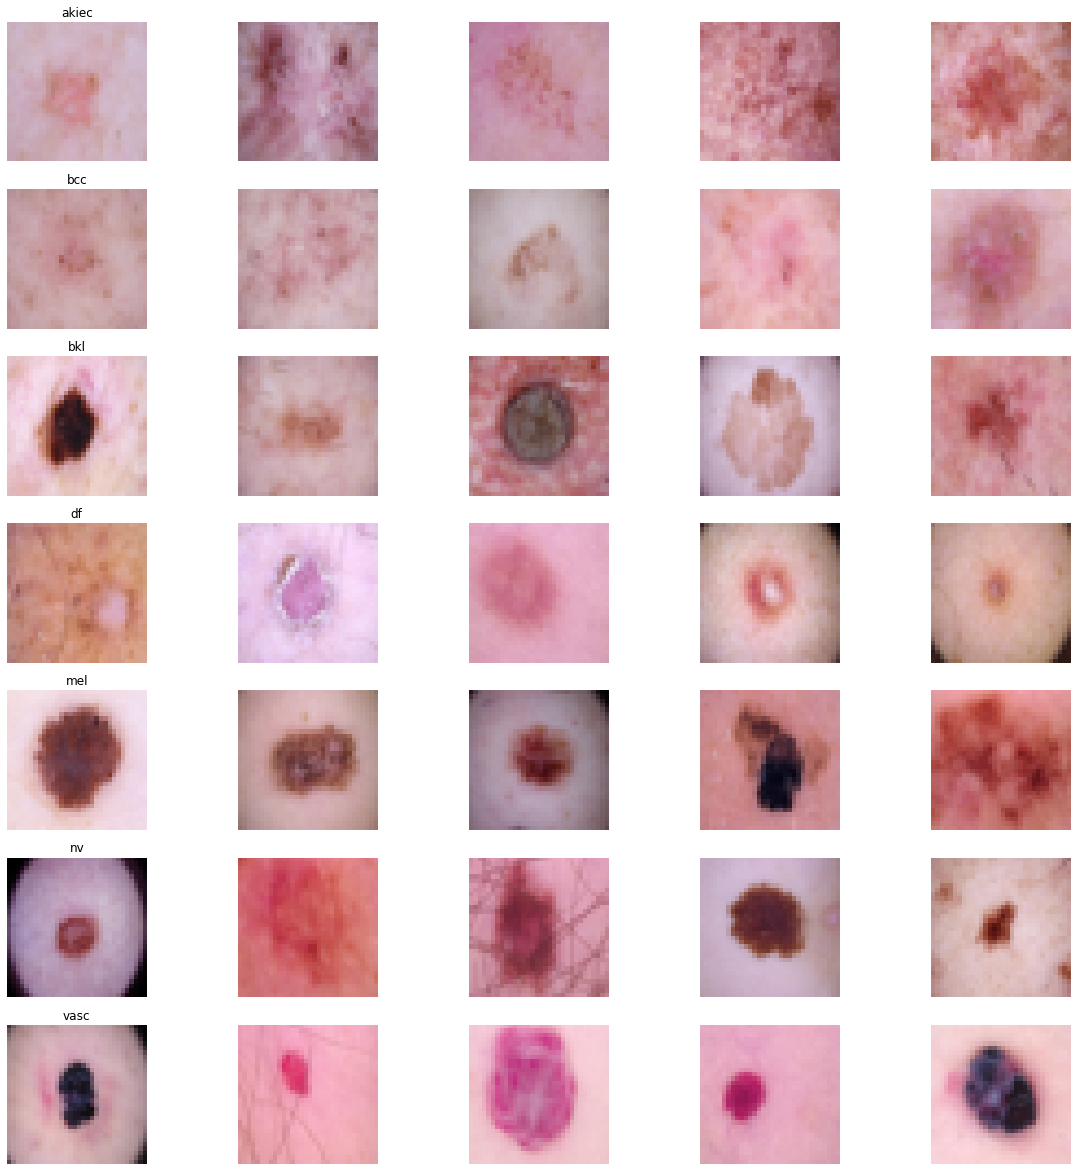

In [12]:
#Section 1.8.2 - Code to display image samples 
n_samples = 5  # number of samples for plotting

#create a figure object fig and an array of subplots m_axs with 7 rows and n_samples columns. 
fig, m_axs = plt.subplots(7, n_samples, figsize = (20, 21))

#loops through the subplots in m_axs and groups the rows in skin_df by the category column,
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['category']).groupby('category')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [13]:
#Section 1.9 - Data Preprocessing 
#Section 1.9.1 - label encoding to numeric values from text
from sklearn.preprocessing import LabelEncoder #Library for categorical encoder
from scipy import stats #Library for statistical functions

#fitting  the target feature 
le=LabelEncoder()
le.fit(skin_df['category'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [14]:
#Section 1.9.2 - transfoming the target feature to numeric values (vector )
skin_df['label']=le.transform(skin_df['category'])
print(skin_df.sample(10))

        lesion_id      image_id category    dx_type   age      sex  \
6559  HAM_0004812  ISIC_0025682       nv  follow_up  35.0   female   
346   HAM_0002392  ISIC_0028233      bkl      histo  55.0     male   
2672  HAM_0003039  ISIC_0031569      bcc      histo  30.0   female   
7844  HAM_0007299  ISIC_0032565       nv      histo  50.0     male   
52    HAM_0007125  ISIC_0029147      bkl      histo  75.0     male   
1285  HAM_0002534  ISIC_0029538      mel      histo  80.0     male   
9603  HAM_0002037  ISIC_0033733       nv  consensus   NaN  unknown   
3541  HAM_0005035  ISIC_0025536       nv  follow_up  35.0   female   
3883  HAM_0007022  ISIC_0026364       nv  follow_up  55.0     male   
1824  HAM_0003225  ISIC_0033593      mel      histo  65.0     male   

         localization        dataset  \
6559            trunk  vidir_molemax   
346              face      rosendahl   
2672             back    vienna_dias   
7844             back   vidir_modern   
52               back   vidir

In [15]:
#Section 1.10 - Data balancing
from sklearn.utils import resample

# Resample each class to 500 samples
n_samples = 500
resampled_df = pd.DataFrame()
for class_label in skin_df['category'].unique():
    class_df = skin_df[skin_df['category'] == class_label]
    resampled_class_df = resample(class_df, replace=True, n_samples=n_samples, random_state=42)
    resampled_df = pd.concat([resampled_df, resampled_class_df])

# Save the resampled dataset
resampled_df.to_csv('resampled_data.csv', index=False)

In [16]:
#Check the distribution. All classes should be balanced now.
print(resampled_df['label'].value_counts())

2    500
5    500
3    500
4    500
6    500
1    500
0    500
Name: label, dtype: int64


In [17]:
#Section 1.11 - assigning images to x and y

#Convert dataframe column of images into numpy array
from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split

X = np.asarray(resampled_df['image'].tolist())
X = X/255.  # Scale values to 0-1.

Y=resampled_df['label']  #Assign label values to Y

Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem

#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.20, random_state=42)

2023-04-29 14:33:21.798390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2800, 32, 32, 3)
(700, 32, 32, 3)
(2800, 7)
(700, 7)


In [19]:
#Section 1.11 - Define the model.
#I've used autokeras to find out the best model for this problem.
#You can also load pretrained networks such as mobilenet or VGG16

#model 1
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization


num_classes = 7

#Define the model 
model = Sequential()

#Adding the layers 
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

#Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

2023-04-29 14:33:27.979185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
##Section 1.12 Train
#You can also use generator to use augmentation during training.

batch_size = 16 #number of samples that are processed at once during trainng
epochs = 50

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


Epoch 1/50
175/175 - 10s - loss: 1.9504 - acc: 0.1425 - val_loss: 1.9421 - val_acc: 0.2114 - 10s/epoch - 58ms/step
Epoch 2/50
175/175 - 9s - loss: 1.8441 - acc: 0.2182 - val_loss: 1.7249 - val_acc: 0.2729 - 9s/epoch - 54ms/step
Epoch 3/50
175/175 - 9s - loss: 1.7227 - acc: 0.2818 - val_loss: 1.6057 - val_acc: 0.3186 - 9s/epoch - 53ms/step
Epoch 4/50
175/175 - 10s - loss: 1.5612 - acc: 0.3550 - val_loss: 1.5356 - val_acc: 0.3571 - 10s/epoch - 55ms/step
Epoch 5/50
175/175 - 11s - loss: 1.4578 - acc: 0.3982 - val_loss: 1.4283 - val_acc: 0.4043 - 11s/epoch - 64ms/step
Epoch 6/50
175/175 - 9s - loss: 1.4165 - acc: 0.4079 - val_loss: 1.4119 - val_acc: 0.4329 - 9s/epoch - 54ms/step
Epoch 7/50
175/175 - 9s - loss: 1.3854 - acc: 0.4450 - val_loss: 1.3419 - val_acc: 0.4500 - 9s/epoch - 53ms/step
Epoch 8/50
175/175 - 9s - loss: 1.3302 - acc: 0.4693 - val_loss: 1.3194 - val_acc: 0.4543 - 9s/epoch - 53ms/step
Epoch 9/50
175/175 - 10s - loss: 1.2803 - acc: 0.4879 - val_loss: 1.2519 - val_acc: 0.4886

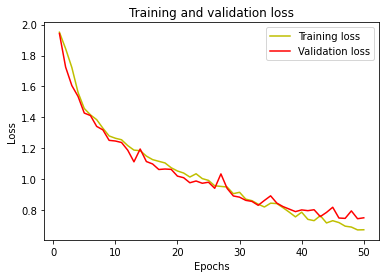

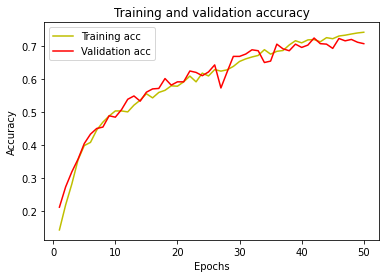

In [21]:
#Section 1.13 - plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
#Section 1.14.1 - Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

22/22 [==============================] - 1s 21ms/step


<AxesSubplot:>

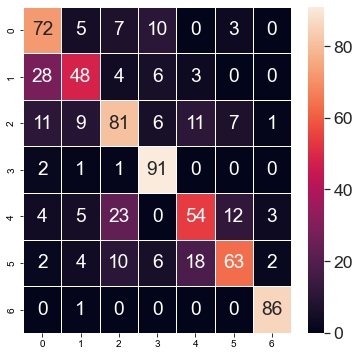

In [23]:
#Section 1.14.2 - Print confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)


fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


In [24]:
#Section 1.15 - Transfer Learning
#model 2

#Importing the model
from keras.applications import vgg16

#shape of the img 
img_rows, img_cols = 32, 32 

#load the base model
vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [25]:
#Section 1.16 - Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False
    # Let's print our layers 
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [26]:
#Section 1.16 - creates the top or head of the model that will be placed ontop of the bottom layers
def lw(bottom_model, num_classes):
    

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model) # Add dropout regularization
    
    top_model = Dense(256,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model) # Add dropout regularization
        
    top_model = Dense(128,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model) # Add dropout regularization)
    
    top_model = Dense(64,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model) # Add dropout regularization
   
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model 

In [27]:
#Section 1.17
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

FC_Head = lw(vgg, num_classes) #base model

model = Model(inputs = vgg.input, outputs = FC_Head)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [28]:
#Section 1.18 - compile model
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [29]:
#Section 1.19 - train 
history = model.fit(x_train,y_train,
                    epochs=50, 
                    validation_data=(x_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
88/88 [==============================] - 12s 123ms/step - loss: 2.0144 - accuracy: 0.1511 - val_loss: 1.9289 - val_accuracy: 0.2671
Epoch 2/50
88/88 [==============================] - 11s 121ms/step - loss: 1.9139 - accuracy: 0.2011 - val_loss: 1.8440 - val_accuracy: 0.2686
Epoch 3/50
88/88 [==============================] - 11s 122ms/step - loss: 1.8413 - accuracy: 0.2557 - val_loss: 1.7150 - val_accuracy: 0.3829
Epoch 4/50
88/88 [==============================] - 11s 121ms/step - loss: 1.7236 - accuracy: 0.2954 - val_loss: 1.6462 - val_accuracy: 0.3929
Epoch 5/50
88/88 [==============================] - 11s 122ms/step - loss: 1.6504 - accuracy: 0.3382 - val_loss: 1.5931 - val_accuracy: 0.4143
Epoch 6/50
88/88 [==============================] - 11s 127ms/step - loss: 1.5876 - accuracy: 0.3721 - val_loss: 1.4828 - val_accuracy: 0.4343
Epoch 7/50
88/88 [==============================] - 10s 118ms/step - loss: 1.5438 - accuracy: 0.4021 - val_loss: 1.4361 - val_accuracy: 0.4586

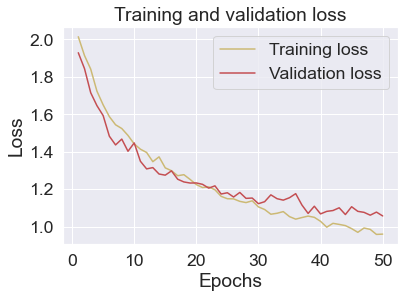

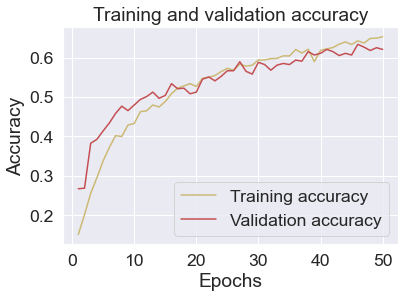

In [30]:
#Section 1.20 - plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
